C:\Users\chand\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Iteration 1: [2770.11852585 2664.56832372 2998.02008756 2720.37471878 2425.36215727]
Iteration 2: [2770.11852585 2664.56832372 2998.02008756 2720.37471878 2425.36215727]
Converged in 2 iterations.
True Densities: [2774.00147497 2661.0225701  2998.02471444 2719.82423489 2418.69488072]
Estimated Densities: [2770.11852585 2664.56832372 2998.02008756 2720.37471878 2425.36215727]


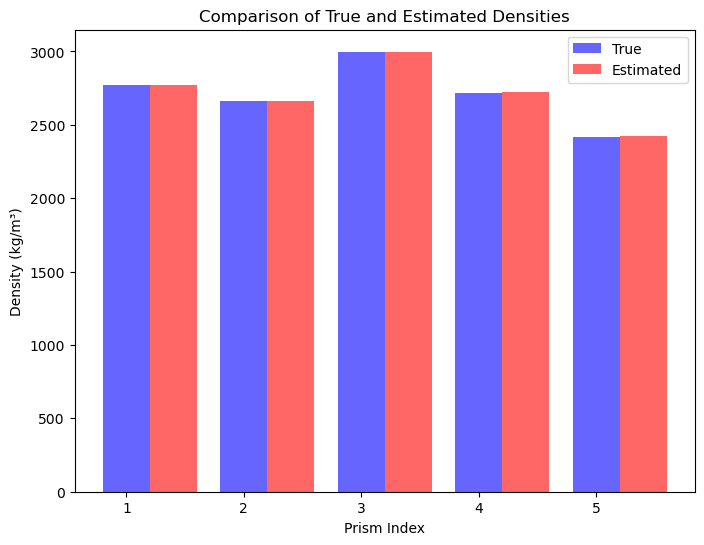

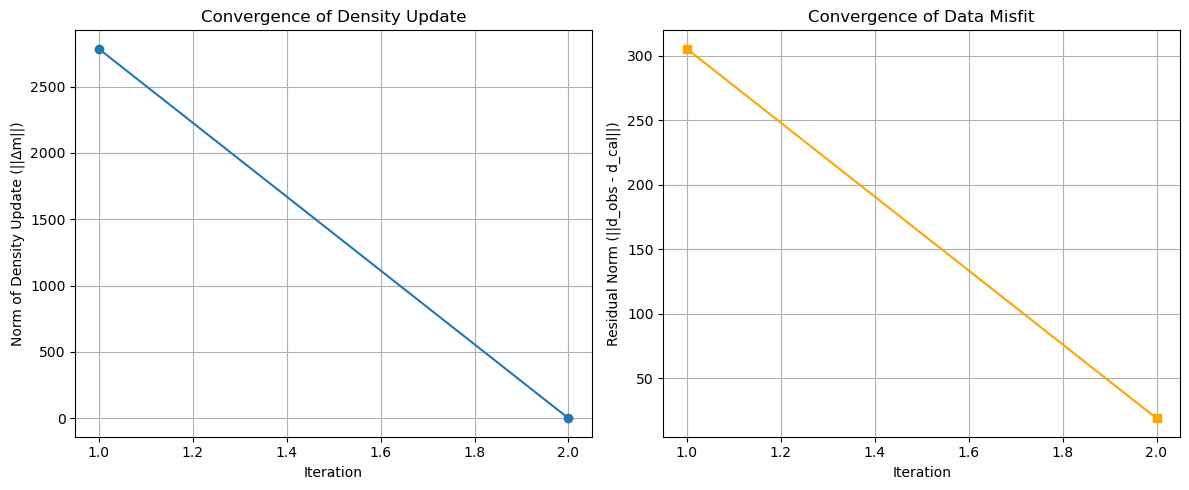

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm
import scipy.optimize as opt

# Define observation grid
x = np.linspace(0, 10000, 50)
y = np.linspace(0, 10000, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)  # Surface observations (z = 0)

# True model: Five prisms with known density (forward model from your code)
true_prisms = np.array([
    [1000, 2000, 1000, 2500, 500, 2500],
    [3000, 4000, 3000, 4500, 500, 2500],
    [5000, 6000, 5000, 6500, 500, 2500],
    [7000, 8000, 2000, 3500, 500, 2500],
    [8500, 9500, 7000, 8500, 500, 2500]
])

true_densities = np.random.uniform(2200, 3000, 5)  # True densities
g_z1 = hm.prism_gravity(coordinates=(X, Y, Z), prisms=true_prisms, density=true_densities, field="g_z").ravel()

def forward_model(density):
    return hm.prism_gravity(coordinates=(X, Y, Z), prisms=true_prisms, density=density, field="g_z").ravel()
noise_level = 0.01  # 1% noise
g_z1 += np.random.normal(0, noise_level * np.abs(g_z1).max(), g_z1.shape)


# Initial guess for densities
estimated_densities = np.random.uniform(1000, 2000, 5)

# Gauss-Newton Iteration Parameters
max_iterations = 20
threshold = 1e-8
convergence_history = []
residual_norm_history = []




for iteration in range(max_iterations):
    # Forward model at current estimate
    dcal1 = forward_model(estimated_densities)

    # Compute Jacobian matrix
    S = np.zeros((g_z1.size, 5))
    for j in range(5):
        changem = estimated_densities.copy()
        delta = 0.01 * changem[j]
        changem[j] += delta
        dcal2 = forward_model(changem)
        S[:, j] = (dcal2 - dcal1) / delta  # FIXED LINE

    # Compute residuals (true - calculated)
    residuals = g_z1 - dcal1  # FIXED LINE

    # Solve for update
    delta_m, _, _, _ = np.linalg.lstsq(S, residuals, rcond=None)

    # Track convergence
    convergence_history.append(np.linalg.norm(delta_m))
    residual_norm_history.append(np.linalg.norm(residuals))

    # Update model
    estimated_densities += delta_m
    print(f"Iteration {iteration+1}: {estimated_densities}")

    if np.linalg.norm(delta_m) < threshold:
        print(f"Converged in {iteration+1} iterations.")
        break



print("True Densities:", true_densities)
print("Estimated Densities:", estimated_densities)

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), true_densities, width=0.4, label='True', color='blue', alpha=0.6)
plt.bar(np.arange(1, 6) + 0.4, estimated_densities, width=0.4, label='Estimated', color='red', alpha=0.6)
plt.xlabel("Prism Index")
plt.ylabel("Density (kg/m³)")
plt.title("Comparison of True and Estimated Densities")
plt.legend()
plt.show()

# Plot: Norm of Density Update
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(convergence_history) + 1), convergence_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Norm of Density Update (||Δm||)")
plt.title("Convergence of Density Update")
plt.grid(True)

# Plot: Norm of Residuals
plt.subplot(1, 2, 2)
plt.plot(range(1, len(residual_norm_history) + 1), residual_norm_history, marker='s', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm (||d_obs - d_cal||)")
plt.title("Convergence of Data Misfit")
plt.grid(True)

plt.tight_layout()
plt.show()



In [5]:
!pip install harmonica

   ---------------------------------------- 0.0/390.9 kB ? eta -:--:--
   ----------------------------- ---------- 286.7/390.9 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 390.9/390.9 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/54.6 kB ? eta -:--:--
   ---------------------------------------- 54.6/54.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/186.6 kB ? eta -:--:--
   ---------------------------------------  184.3/186.6 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 186.6/186.6 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB ? eta 0:00:00


In [7]:
!pip install verde

SyntaxError: incomplete input (984890137.py, line 20)

Iteration 1: [1714.21396722 1835.47741874 1956.04060835 1814.92933772 1763.77303611]
Iteration 2: [2053.56424302 2167.76328073 2374.49512836 2190.10732973 2156.45880276]
Iteration 3: [2220.32267692 2290.35243152 2556.78363708 2364.66847861 2362.78375862]
Iteration 4: [2305.78317289 2328.55426102 2635.80370697 2446.97390603 2473.47454562]
Iteration 5: [2351.727895   2334.87701964 2669.93617006 2486.41999893 2534.00623772]
Iteration 6: [2377.67948731 2330.65901571 2684.69768533 2505.69783946 2567.66913362]
Iteration 7: [2393.02926912 2324.1162138  2691.16497458 2515.33381302 2586.65564742]
Iteration 8: [2402.47029075 2318.08803851 2694.10368204 2520.27190013 2597.48590219]
Iteration 9: [2408.45758171 2313.31138893 2695.54146797 2522.86996219 2603.71649279]
Iteration 10: [2412.34106184 2309.77139159 2696.33011811 2524.27343322 2607.32209862]
Iteration 11: [2414.90022247 2307.23642113 2696.82323135 2525.05087218 2609.41582654]
Iteration 12: [2416.60513122 2305.45459302 2697.16703459 2525.4

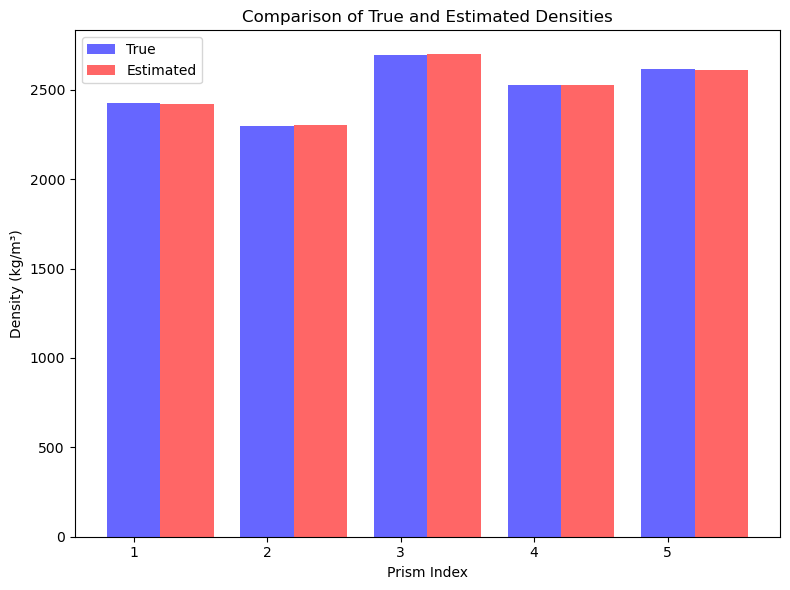

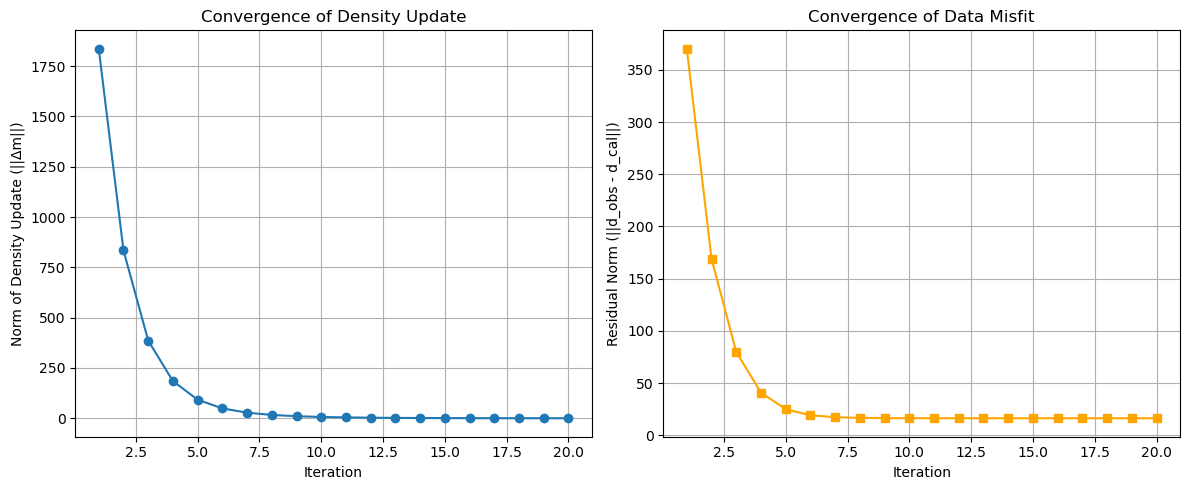

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm

# Define observation grid
x = np.linspace(0, 10000, 50)
y = np.linspace(0, 10000, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)  # Surface observations (z = 0)

# True model: Five prisms with known density
true_prisms = np.array([
    [1000, 2000, 1000, 2500, 500, 2500],
    [3000, 4000, 3000, 4500, 500, 2500],
    [5000, 6000, 5000, 6500, 500, 2500],
    [7000, 8000, 2000, 3500, 500, 2500],
    [8500, 9500, 7000, 8500, 500, 2500]
])

true_densities = np.random.uniform(2200, 3000, 5)  # True densities
g_z1 = hm.prism_gravity(coordinates=(X, Y, Z), prisms=true_prisms, density=true_densities, field="g_z").ravel()

# Add noise
noise_level = 0.01  # 1% noise
g_z1 += np.random.normal(0, noise_level * np.abs(g_z1).max(), g_z1.shape)

# Forward model
def forward_model(density):
    return hm.prism_gravity(coordinates=(X, Y, Z), prisms=true_prisms, density=density, field="g_z").ravel()

# Inversion parameters
estimated_densities = np.full(5, 1000.0)  # Poor initial guess
max_iterations = 20
threshold = 1e-8
damping = 1e-2
delta = 1.0

convergence_history = []
residual_norm_history = []

for iteration in range(max_iterations):
    dcal1 = forward_model(estimated_densities)

    # Jacobian
    S = np.zeros((g_z1.size, 5))
    for j in range(5):
        changem = estimated_densities.copy()
        changem[j] += delta
        dcal2 = forward_model(changem)
        S[:, j] = (dcal2 - dcal1) / delta

    residuals = g_z1 - dcal1

    # Levenberg-Marquardt update
    A = S.T @ S + damping * np.eye(S.shape[1])
    b = S.T @ residuals
    delta_m = np.linalg.solve(A, b)

    # Update
    estimated_densities += delta_m

    convergence_history.append(np.linalg.norm(delta_m))
    residual_norm_history.append(np.linalg.norm(residuals))

    print(f"Iteration {iteration + 1}: {estimated_densities}")

    if np.linalg.norm(delta_m) < threshold:
        print(f"Converged in {iteration + 1} iterations.")
        break

# Results
print("True Densities:", true_densities)
print("Estimated Densities:", estimated_densities)

# Plot: True vs Estimated
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), true_densities, width=0.4, label='True', color='blue', alpha=0.6)
plt.bar(np.arange(1, 6) + 0.4, estimated_densities, width=0.4, label='Estimated', color='red', alpha=0.6)
plt.xlabel("Prism Index")
plt.ylabel("Density (kg/m³)")
plt.title("Comparison of True and Estimated Densities")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Convergence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(convergence_history) + 1), convergence_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Norm of Density Update (||Δm||)")
plt.title("Convergence of Density Update")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(residual_norm_history) + 1), residual_norm_history, marker='s', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm (||d_obs - d_cal||)")
plt.title("Convergence of Data Misfit")
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
noise_level = 0.01  # 1% noise
g_z1 += np.random.normal(0, noise_level * np.abs(g_z1).max(), g_z1.shape)
g_z1
len(g_z1)


2500

In [25]:
estimated_densities = np.full(5, 1000.0)
estimated_densities
len(estimated_densities)

5

Iteration 1: [2282.02894784 1762.19591082 2271.25390168 2296.44825201 2143.01968614]
Iteration 2: [2698.81514172 1971.9837919  2708.44189879 2717.25299607 2430.47904286]
Iteration 3: [2836.18438804 2021.6557701  2864.47153254 2855.96935932 2497.32089192]
Iteration 4: [2882.38438754 2028.45828266 2922.49433499 2902.47040749 2510.45521118]
Iteration 5: [2898.38553143 2025.8805344  2945.02372954 2918.34484069 2511.87494325]
Iteration 6: [2904.15767412 2022.57342732 2954.15449875 2923.87265764 2511.36100926]
Iteration 7: [2906.35126066 2020.22385117 2958.00658749 2925.84021091 2510.84745695]
Iteration 8: [2907.23646919 2018.80280456 2959.6907522  2926.55792021 2510.55222172]
Iteration 9: [2907.61622076 2018.00248487 2960.44978838 2926.82706702 2510.40660178]
Iteration 10: [2907.78832078 2017.56842904 2960.80053131 2926.93119349 2510.33918237]
Iteration 11: [2907.86979967 2017.33810966 2960.96588946 2926.97289013 2510.3087952 ]
Iteration 12: [2907.90960777 2017.21752657 2961.04509386 2926.9

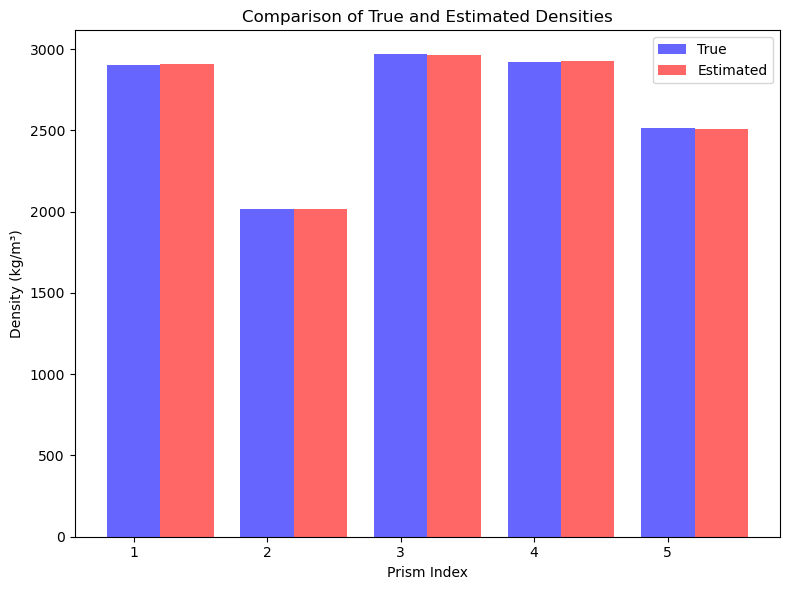

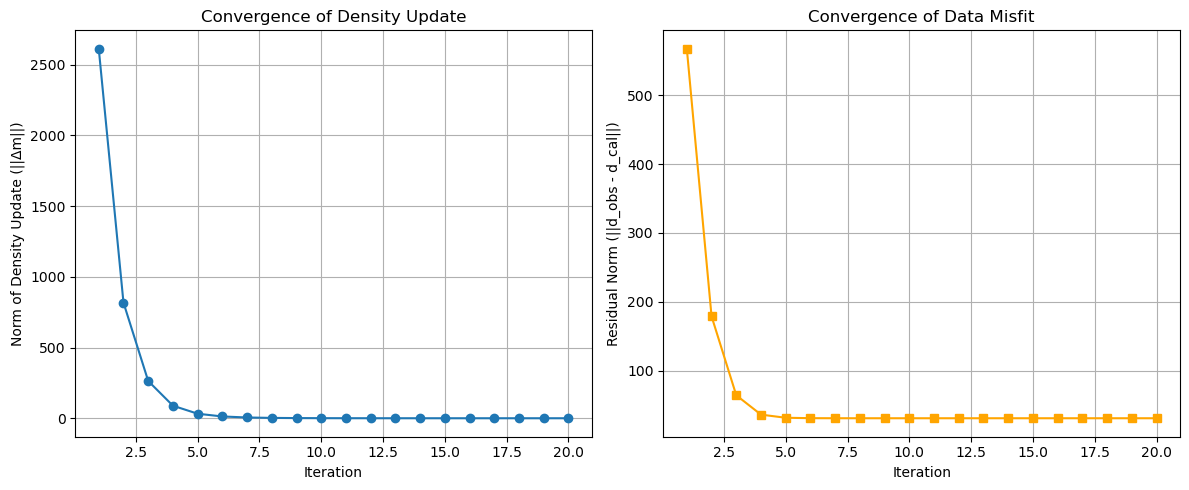

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm

# Define observation grid
x = np.linspace(0, 10000, 50)
y = np.linspace(0, 10000, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)  # Surface observations (z = 0)




true_prisms = ([
    [1000, 2000, 1000, 2500, 100, 2500],
    [3000, 4000, 3000, 4500, 202, 2000],
    [5000, 6000, 5000, 6500, 120, 1900],
    [7000, 8000, 2000, 3500, 300, 3500],
    [8500, 9500, 7000, 8500, 100, 4000]
])


# True model: Five prisms with known density
'''
true_prisms = np.array([
   [1000, 2000, 1000, 2500, 100, 2500],
    [3000, 4000, 3000, 4500, 202, 2000],
    [5000, 6000, 5000, 6500, 120, 1900],
    [7000, 8000, 2000, 3500, 300, 3500],
    [8500, 9500, 7000, 8500, 100, 4000
])
'''
true_densities = np.array([2901.29821889, 2018.89666007, 2966.49996215, 2920.28804909, 2512.87977478])
  # True densities
g_z1 = hm.prism_gravity(coordinates=(X, Y, Z), prisms=true_prisms, density=true_densities, field="g_z").ravel()

# Add noise
noise_level = 0.01  # 1% noise
g_z1 += np.random.normal(0, noise_level * np.abs(g_z1).max(), g_z1.shape)

# Forward model
def forward_model(density):
    return hm.prism_gravity(coordinates=(X, Y, Z), prisms=true_prisms, density=density, field="g_z").ravel()

# Inversion parameters
estimated_densities = np.full(5, 1000.0)  # Poor initial guess
max_iterations = 20
threshold = 1e-8
damping = 1e-2
delta = 1.0

convergence_history = []
residual_norm_history = []

for iteration in range(max_iterations):
    dcal1 = forward_model(estimated_densities)

    # Jacobian
    S = np.zeros((g_z1.size, 5))
    for j in range(5):
        changem = estimated_densities.copy()
        changem[j] += delta
        dcal2 = forward_model(changem)
        S[:, j] = (dcal2 - dcal1) / delta

    residuals = g_z1 - dcal1

    # Levenberg-Marquardt update
    A = S.T @ S + damping * np.eye(S.shape[1])
    b = S.T @ residuals
    delta_m = np.linalg.solve(A, b)

    # Update
    estimated_densities += delta_m

    convergence_history.append(np.linalg.norm(delta_m))
    residual_norm_history.append(np.linalg.norm(residuals))

    print(f"Iteration {iteration + 1}: {estimated_densities}")

    if np.linalg.norm(delta_m) < threshold:
        print(f"Converged in {iteration + 1} iterations.")
        break

# Results
print("True Densities:", true_densities)
print("Estimated Densities:", estimated_densities)




# Plot: True vs Estimated
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), true_densities, width=0.4, label='True', color='blue', alpha=0.6)
plt.bar(np.arange(1, 6) + 0.4, estimated_densities, width=0.4, label='Estimated', color='red', alpha=0.6)
plt.xlabel("Prism Index")
plt.ylabel("Density (kg/m³)")
plt.title("Comparison of True and Estimated Densities")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Convergence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(convergence_history) + 1), convergence_history, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Norm of Density Update (||Δm||)")
plt.title("Convergence of Density Update")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(residual_norm_history) + 1), residual_norm_history, marker='s', color='orange')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm (||d_obs - d_cal||)")
plt.title("Convergence of Data Misfit")
plt.grid(True)

plt.tight_layout()
plt.show() 
#Can u run this code, i have changed a body a bit....bcoz in the anomaly map, the bodies are showing same depth, but that's not the case while he did from numerical integration


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

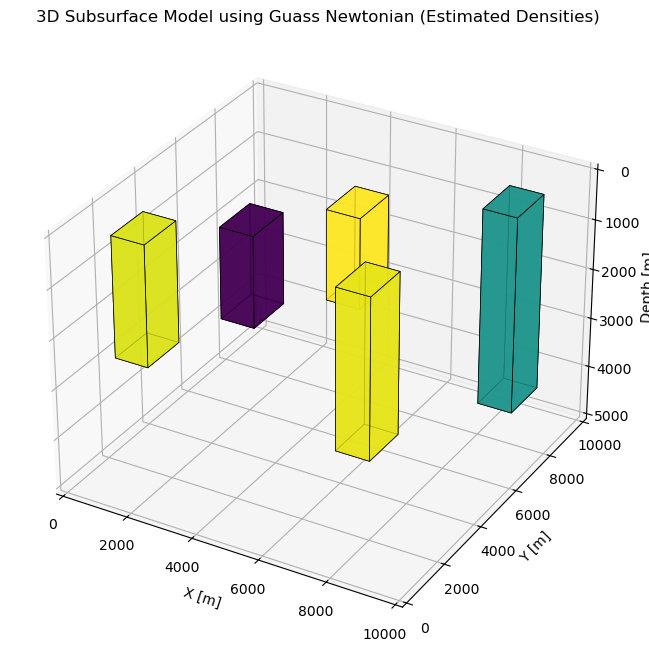

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors

# Prism definitions
prisms = np.array([
    [1000, 2000, 1000, 2500, 100, 2500],
    [3000, 4000, 3000, 4500, 202, 2000],
    [5000, 6000, 5000, 6500, 120, 1900],
    [7000, 8000, 2000, 3500, 300, 3500],
    [8500, 9500, 7000, 8500, 100, 4000]
])

# Estimated densities
estimated_densities = np.array([2907.94976971, 2017.08917209, 2961.12052646, 2927.00397952, 2510.28398805])

# Normalize densities for color mapping
norm = mcolors.Normalize(vmin=estimated_densities.min(), vmax=estimated_densities.max())
cmap = plt.cm.viridis

def plot_prism(ax, prism, density, color):
    x1, x2, y1, y2, z1, z2 = prism
    verts = [
        # bottom face
        [(x1, y1, z1), (x2, y1, z1), (x2, y2, z1), (x1, y2, z1)],
        # top face
        [(x1, y1, z2), (x2, y1, z2), (x2, y2, z2), (x1, y2, z2)],
        # sides
        [(x1, y1, z1), (x2, y1, z1), (x2, y1, z2), (x1, y1, z2)],
        [(x2, y1, z1), (x2, y2, z1), (x2, y2, z2), (x2, y1, z2)],
        [(x2, y2, z1), (x1, y2, z1), (x1, y2, z2), (x2, y2, z2)],
        [(x1, y2, z1), (x1, y1, z1), (x1, y1, z2), (x1, y2, z2)],
    ]
    poly = Poly3DCollection(verts, facecolors=color, linewidths=0.5, edgecolors='k', alpha=0.8)
    ax.add_collection3d(poly)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Subsurface Model using Guass Newtonian (Estimated Densities)')

# Plot each prism
for i, prism in enumerate(prisms):
    color = cmap(norm(estimated_densities[i]))
    plot_prism(ax, prism, estimated_densities[i], color)

# Set labels and limits
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Depth [m]')
ax.set_xlim(0, 10000)
ax.set_ylim(0, 10000)
ax.set_zlim(5000, 0)  # Depth increases downward

# Add colorbar
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(estimated_densities)
cbar = plt.colorbar(mappable, shrink=0.6, pad=0.1)
cbar.set_label('Estimated Density (kg/m³)')

plt.tight_layout()
plt.show()
